In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open("./traffic-signs-data/train.p", mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
X_test.shape

(12630, 32, 32, 3)

# data exploration

41

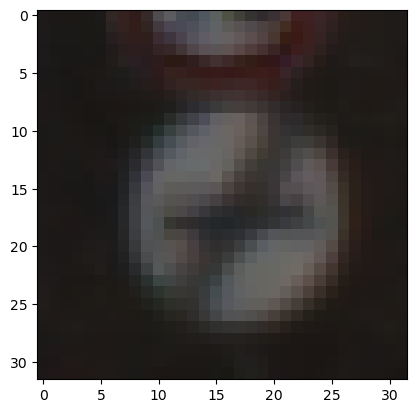

In [9]:
plt.imshow(X_train[0])
y_train[0]

23

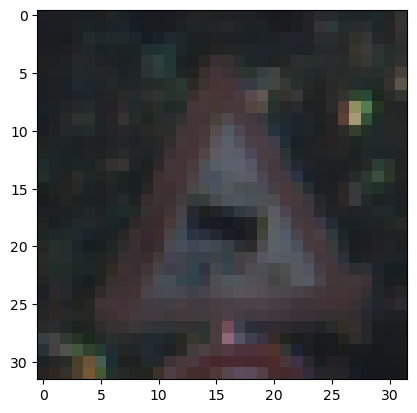

In [10]:
plt.imshow(X_train[2000])
y_train[2000]

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims = True)

In [13]:
X_train_gray.shape

(34799, 32, 32, 1)

In [14]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

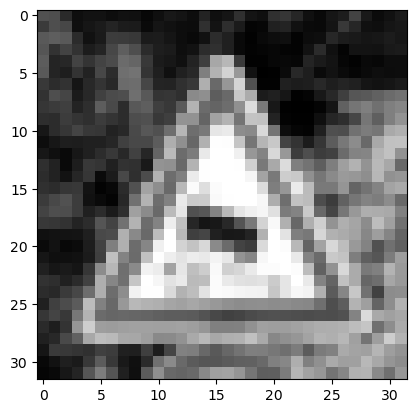

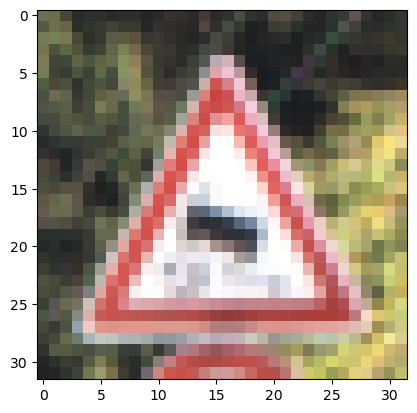

In [15]:
plt.imshow(X_train_gray[1000].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[1000])

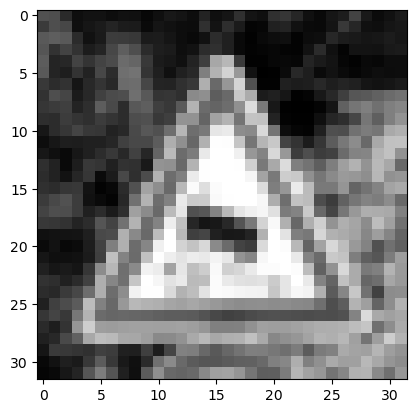

In [16]:
plt.imshow(X_train_gray_norm[1000].squeeze(), cmap = 'gray')

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [18]:
cnn_model = Sequential([
    Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(),

    Conv2D(filters=16, kernel_size=(5,5), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(units=120, activation='relu'),
    Dense(units=84, activation='relu'),
    Dense(units=43, activation='softmax'),
])

C:\Users\ramch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [20]:
history = cnn_model.fit(X_train_gray_norm, y_train, batch_size = 500, epochs = 100, verbose = 1, validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1156 - loss: 3.4287 - val_accuracy: 0.3723 - val_loss: 2.4216
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5172 - loss: 1.7659 - val_accuracy: 0.6417 - val_loss: 1.3557
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7486 - loss: 0.9198 - val_accuracy: 0.7465 - val_loss: 0.9631
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8379 - loss: 0.6160 - val_accuracy: 0.7946 - val_loss: 0.7903
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8870 - loss: 0.4505 - val_accuracy: 0.8222 - val_loss: 0.6784
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9154 - loss: 0.3396 - val_accuracy: 0.8560 - val_loss: 0.6049
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9362 - loss: 0.2751 - val_accuracy: 0.8667 - val_loss: 0.5666
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9449 - loss: 0.2348 - val_accuracy: 0.

In [21]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
score[1]

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9088 - loss: 1.1261


0.909184455871582

In [46]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [50]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

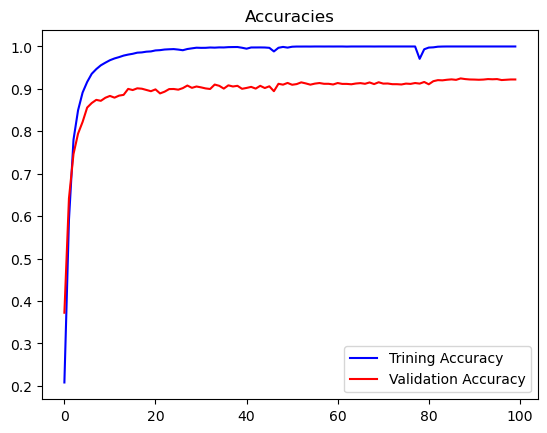

In [54]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label = 'Trining Accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation Accuracy')
plt.title('Accuracies')
plt.legend()
plt.show()

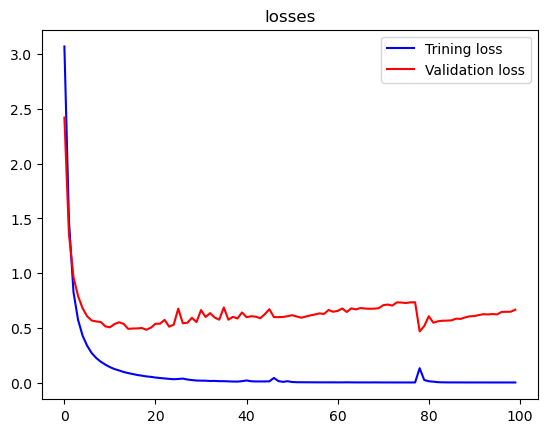

In [56]:
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label = 'Trining loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('losses')
plt.legend()
plt.show()

In [70]:
predicted_probs = cnn_model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predicted_probs, axis=1)
y_true = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


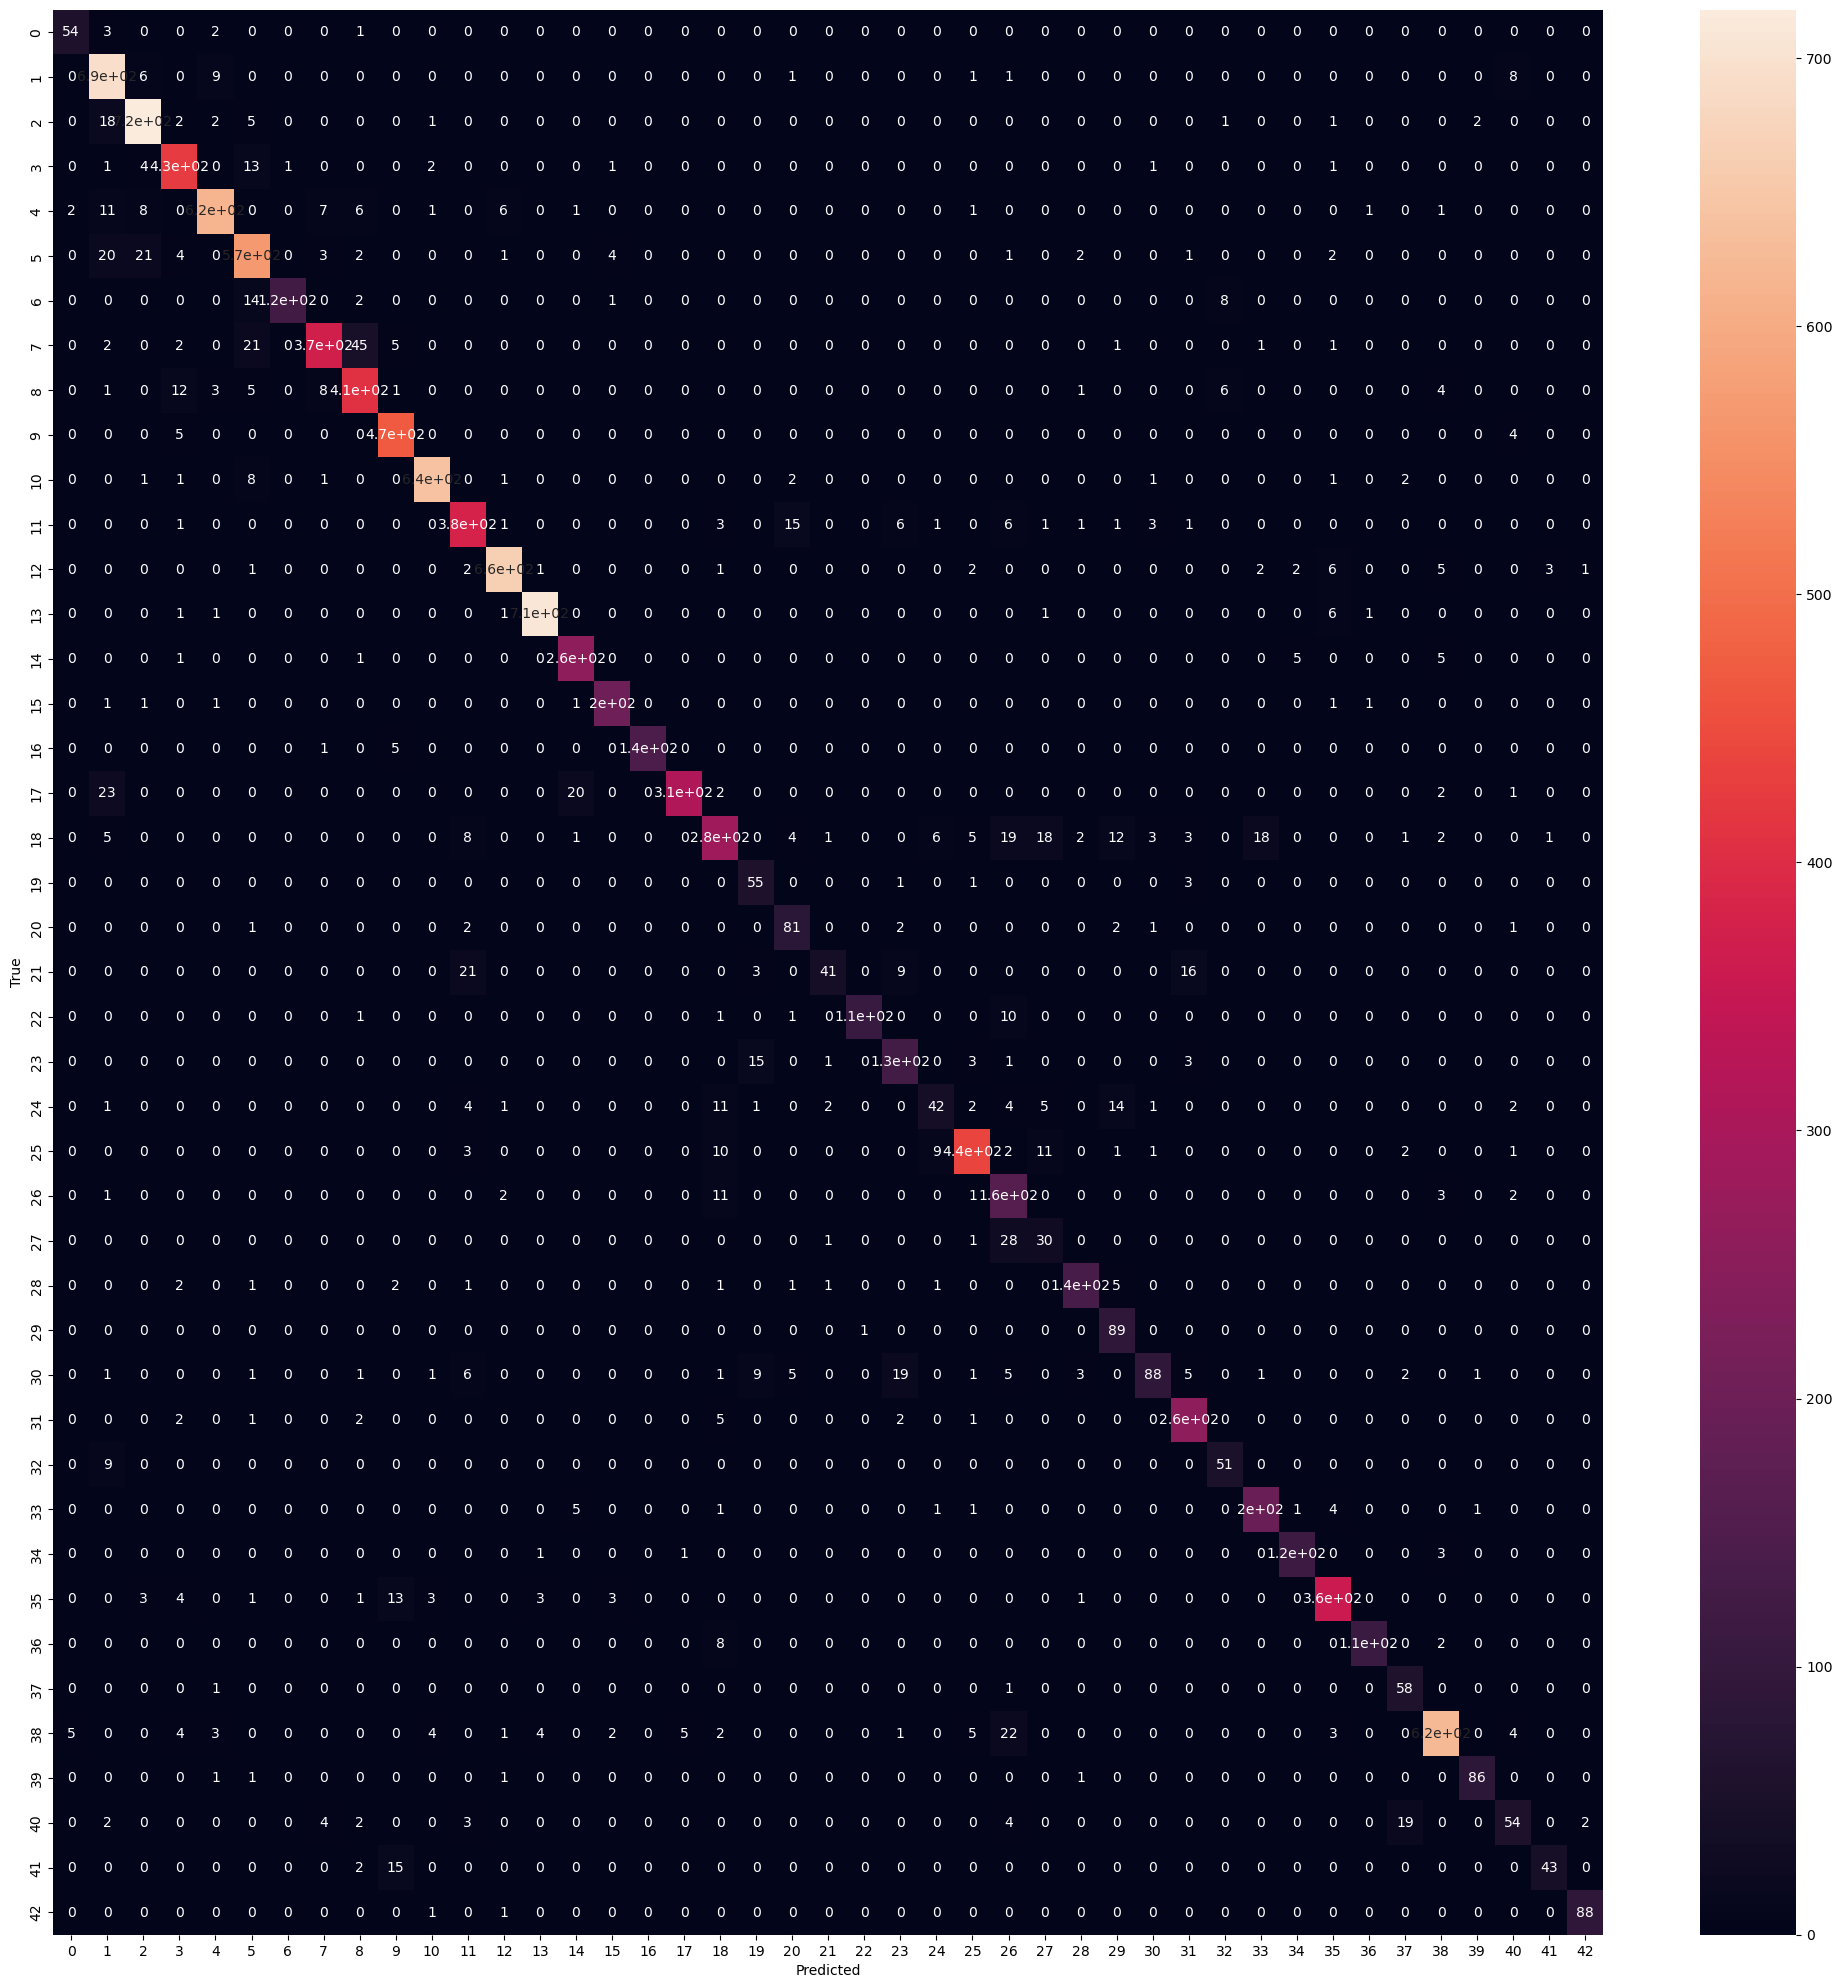

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)

plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

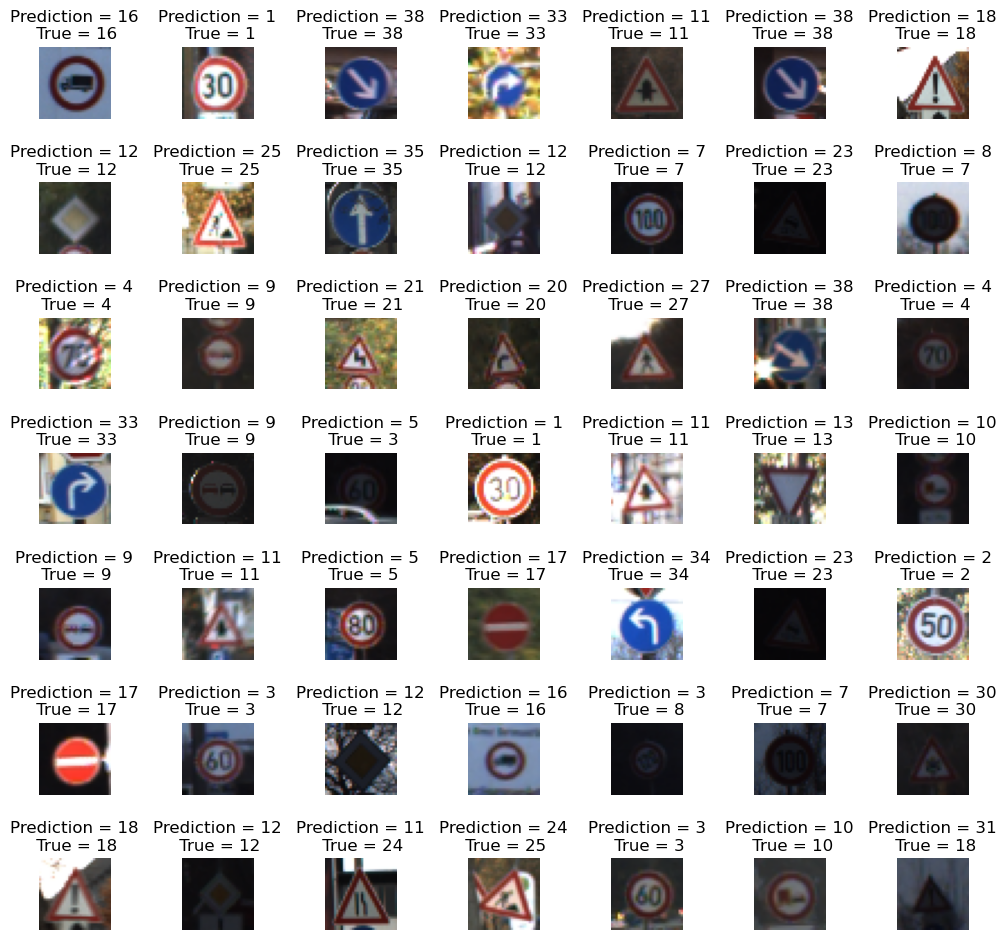

In [78]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)